In [1]:
# notebook for generating correlated multiuniforms

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Example creating correlated multivariate normal


$X$ and $Y$ are two random variables with mean $\mu_X$ and $\mu_Y$


play around with cov_xy to see different scatter plots with more or less correlated samples

In [3]:
mu_x = 0
mu_y = 0
var_x = 1.0
var_y = 1.0

cov_xy = 0.75

mean_vector = np.array([mu_x, mu_y])
cov_matrix = np.matrix([[var_x, cov_xy], [cov_xy, var_y]])

# generate 1000 samples of X and Y
np.random.seed(400)
randoms = np.random.multivariate_normal(mean_vector, cov_matrix, size=1000)

Text(0.5, 1.0, 'Covariance: 0.75')

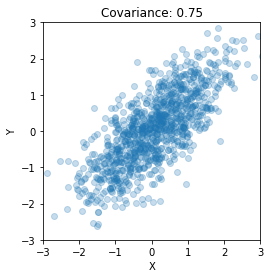

In [4]:
# plot the results:
plt.scatter(randoms[:,0], randoms[:,1], alpha=0.25)
ax = plt.gca()
plt.xlim([-3.0, 3.0])
plt.ylim([-3.0, 3.0])
ax.set_aspect('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Covariance: {cov_xy}')

# Map a multivariate normal distribution to a multivariate uniform one

In [5]:
# Load the covariance matrix
covariance_file = '/work/westgroup/harris.se/autoscience/autoscience/uncertainty/butane_covariance.pickle'
with open(covariance_file, 'rb') as handle:
    Sigma_k = pickle.load(handle)

In [6]:
# Generate the multivariate randoms
mean_vec = np.zeros(Sigma_k.shape[0])  # Sigma_k is a square matrix
normal_randoms = np.random.multivariate_normal(mean_vec, Sigma_k, size=1000)

/work/westgroup/harris.se/tst_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
normal_randoms.shape

(1000, 1822)

In [8]:
# compute the CDF
sorted_normals = np.sort(normal_randoms, axis=0)
CDF = np.zeros(sorted_normals.shape)
for rxn_index in range(0, sorted_normals.shape[1]):
    # the variance represents the 1/12*(b-a)^2
    # the variance represents the a^2/3
    var = Sigma_k[rxn_index, rxn_index]
    a = np.sqrt(3 * var)  # assumed uniform distribution is symmetric about zero
    CDF[:, rxn_index] = np.linspace(-a, a, sorted_normals.shape[0])

In [9]:
# function to actually convert the normal randoms into uniform randoms
def normal_to_uniform(sample, rxn_index):
    # assumes CDF is already defined
    # find the closest value to the input
    distance = np.abs(sorted_normals[:, rxn_index] - sample)
    closest_index = np.argmin(distance)
    return CDF[closest_index, rxn_index]

In [10]:
# convert all those normal variables to uniforms
uniform_randoms = np.zeros(normal_randoms.shape)
for i in range(0, normal_randoms.shape[0]):
    for j in range(0, normal_randoms.shape[1]):
        uniform_randoms[i, j] = normal_to_uniform(normal_randoms[i, j], j)


In [13]:
# check correlation coefficients with a few examples
# reaction 0 is independent, then 324 is correlated with 325, and 327
print(np.corrcoef(uniform_randoms[:, 324], uniform_randoms[:, 325]))
print()
print(np.corrcoef(uniform_randoms[:, 324], uniform_randoms[:, 0]))

[[1.         0.49272498]
 [0.49272498 1.        ]]

[[1.         0.03604393]
 [0.03604393 1.        ]]


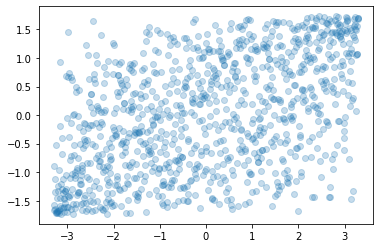

In [14]:
# plot the correlation of two variables for an example
plt.scatter(uniform_randoms[:, 324], uniform_randoms[:, 325], alpha=0.25)

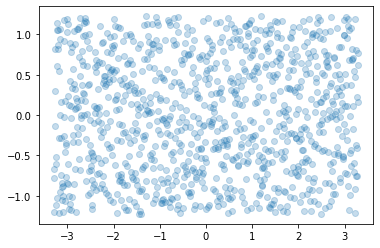

In [15]:
# plot the correlation of two variables for an example
plt.scatter(uniform_randoms[:, 324], uniform_randoms[:, 0], alpha=0.25)